In [1]:
from numpy import random
import diptest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.lines import Line2D
import seaborn as sns
import os
import pandas as pd
from MFDFA import fgn

In [2]:
%store -r filter_data
%store -r asia_dip
%store -r euro_dip

asia_region = ('Australia', 'Indonesia',  'Malaysia',   'Singapore')
euro_region = ('Balearic',  'Iceland',  'Ireland')

asia_colors = ('#1b9e77', '#d95f02','#7570b3','#e7298a')
euro_colors = ('#66a61e', '#e6ab02','#a6761d')


In [25]:
# Set the parameters for the two peaks
mu1, sigma1 = 40,  2.5 # mean and standard deviation of the first peak
mu2, sigma2 = 60,  2.5 # mean and standard deviation of the second peak

# Generate random data using the Gaussian distribution with the two peaks
x1 = np.linspace(30, 70, 100000)
y1 = (1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(x1-mu1)**2/(2*sigma1**2))) + (1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(x1-mu2)**2/(2*sigma2**2)))

In [26]:
# Set the parameters for the two peaks
mu1, sigma1 = 50, 5 # mean and standard deviation of the first peak
mu2, sigma2 = 50, 5 # mean and standard deviation of the second peak

# Generate random data using the Gaussian distribution with the two peaks
x3 = np.linspace(30, 70, 100000)
y3 = (1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(x3-mu1)**2/(2*sigma1**2))) + (1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(x3-mu2)**2/(2*sigma2**2)))


In [27]:
uni = random.normal(loc=0, scale=0.0015,size=100000)
y=[y1,uni]
y_dip=[]
for i, df in enumerate (y):
    dip,pval = diptest.diptest(df.astype(float))
    y_dip.append((dip))
    
syth=('Non-standard','Unimodal')

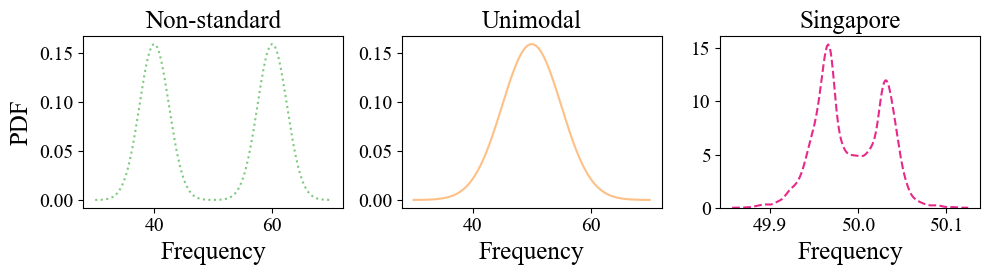

In [28]:
# Create three subplots
colors = ('#7fc97f', '#fdc086','#e7298a')
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

for ax in axs:
    ax.tick_params(axis='both', labelsize=14) 

# Plot the first peak on the first subplot
axs[0].plot(x1, y1,linestyle = 'dotted',color=colors[0])
axs[0].set_title('Non-standard',fontsize=18)
axs[0].set_ylabel('PDF',fontsize=18)
axs[0].set_xlabel('Frequency',fontsize=18)

# Plot the second peak on the third subplot
axs[1].plot(x3, y3,color=colors[1])
axs[1].set_title('Unimodal',fontsize=18)
axs[1].set_xlabel('Frequency',fontsize=18)

# Plot the third peak on the second subplot
sns.kdeplot(filter_data[3].f50, color='#e7298a',linestyle = 'dashed',legend=False,ax=axs[2])
axs[2].set_title('Singapore',fontsize=18)
axs[2].set_xlabel('Frequency',fontsize=18)
axs[2].set_ylabel('')

# Add a main title and adjust the layout
fig.suptitle('')
plt.tight_layout()
#plt.show()
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.savefig('C:/4. Paper plots/figure 3a.pdf')

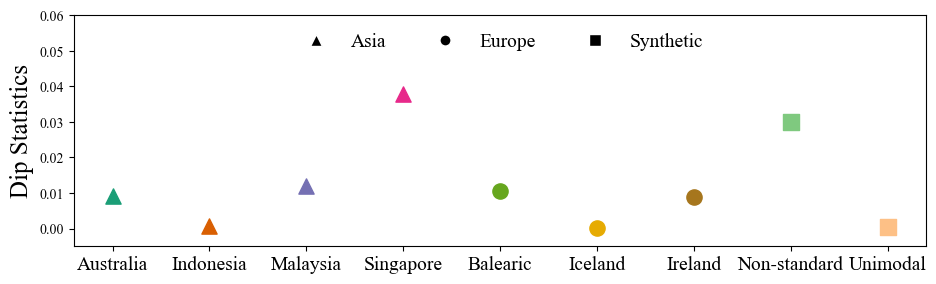

In [29]:
colors = ('#7fc97f', '#fdc086','#e7298a')
fig, ax = plt.subplots(figsize=(11, 3))

# plot the asia_dip data
for i, dip in enumerate(asia_dip):
    ax.scatter(i, dip, color=asia_colors[i], marker='^', label=asia_region[i],s=120)
    
# plot the euro_dip data
for i, dip in enumerate(euro_dip):
    ax.scatter(i+len(asia_dip), dip, color=euro_colors[i], marker='o', label=euro_region[i],s=120)
    
# plot the euro_dip data
for i, dip in enumerate(y_dip):
    ax.scatter(i+len(euro_dip)+len(asia_dip), dip, color=colors[i], marker='s',label=syth[i],s=120)


# set the axis labels and title
#ax.set_xlabel('Regions')
ax.set_ylabel('Dip Statistics',fontsize=18)
#ax.set_title('Dip Comparison')

# set the xticks
ax.set_xticks(list(range(len(asia_dip)+len(euro_dip)+2)))
ax.set_xticklabels(asia_region + euro_region + syth,fontsize=14)

# set the legend
#ax.legend(ncol=2,frameon=False)
# create legend elements
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Asia', markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Europe', markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Synthetic', markerfacecolor='k', markersize=8)]

# add legend to plot
ax.legend(handles=legend_elements, ncol=3,loc='upper center', frameon=False,fontsize=14)

ax.set_ylim(-0.005, 0.06)
plt.rcParams.update({'font.family': 'Times New Roman'})
#plt.show()
plt.savefig('C:/4. Paper plots/figure 3b.pdf')

In [2]:
%store -r asia_lt
%store -r euro_lt
%store -r ire_rmse_lt2
%store -r model_lt

asia_region = ('Australia', 'Indonesia',  'Malaysia',   'Singapore')
euro_region = ('Balearic',  'Iceland',  'Ireland')
syth=('Model1','Model3','Model4')

asia_colors = ('#1b9e77', '#d95f02','#7570b3','#e7298a')
euro_colors = ('#66a61e', '#e6ab02','#a6761d')
colors = ('#7fc97f', '#fdc086','#beaed4')

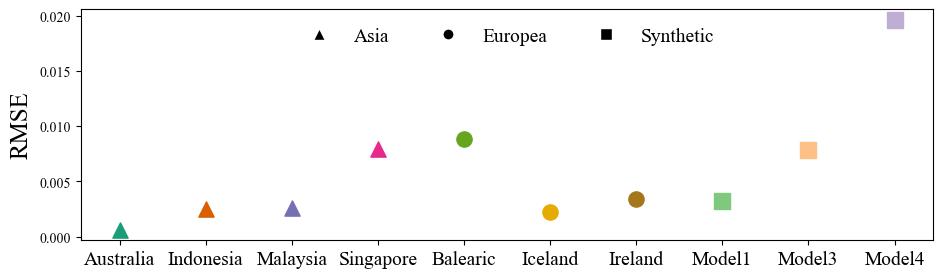

In [6]:
fig, ax = plt.subplots(figsize=(11, 3))

# plot the asia_dip data
for i, (region, rmse) in enumerate(asia_lt):
    ax.scatter(i, rmse, color=asia_colors[i], marker='^', label=asia_region[i],s=120)
    
# plot the euro_dip data
for i, (region, rmse) in enumerate(euro_lt):
    ax.scatter(i+len(asia_lt), rmse, color=euro_colors[i], marker='o', label=euro_region[i],s=120)
    
# plot the model rmse data
for i, (region, rmse) in enumerate(model_lt):
    ax.scatter(i+len(euro_lt)+len(asia_lt), rmse, color=colors[i], marker='s',label=syth[i],s=120)


# set the axis labels and title
#ax.set_xlabel('Regions')
ax.set_ylabel('RMSE',fontsize=18)
#ax.set_title('RMSE Comparison')

# set the xticks
ax.set_xticks(list(range(len(asia_lt)+len(euro_lt)+3)))
ax.set_xticklabels(asia_region + euro_region + syth, fontsize=14)

# set the legend
#ax.legend(ncol=2,frameon=False)

# set the yticks
#yticks = np.concatenate((np.arange(0, 0.006, 0.001), np.arange(1, 4, 1)))
#ax.set_yticks(yticks)


# create legend elements
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Asia', markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Europea', markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Synthetic', markerfacecolor='k', markersize=8)]

# add legend to plot
ax.legend(handles=legend_elements, ncol=3,loc='upper center', frameon=False,fontsize=14)

plt.rcParams.update({'font.family': 'Times New Roman'})
#plt.show()

plt.savefig('C:/4. Paper plots/figure 5.pdf')

In [5]:
def generate_fractional_ou_process(H, t_final, delta_t, theta, sigma):
    # Time array
    time = np.linspace(0, t_final, int(t_final / delta_t) + 1)

    # Fractional Gaussian noise
    dB = (t_final ** H) * fgn(N=time.size, H=H)

    # Initialize the array
    y = np.zeros(time.size)
    y[0] = np.random.normal(size=1) / 10

    # Integrate the process
    for i in range(1, time.size):
        y[i] = y[i - 1] - theta * y[i - 1] * delta_t + sigma * dB[i]

    return time, y


def CKtest (data, tau1, tau2, tau3, bins):
    
    data1 = data[tau1:-tau1] # x3
    data2 = data[tau2:-tau2] # x2
    data3 = data[tau3:-tau3] # x1
    
    # Find bin borders
    dx1 = np.ptp(data3/(bins-1))  # the difference between max and min of data
    dx2 = np.ptp(data2)/(bins-1)
    dx3 = np.ptp(data1)/(bins-1)
    x1 = np.arange(min(data3), np.max(data3)+dx1, dx1)
    x2 = np.arange(min(data2), np.max(data2)+dx2, dx2)
    x3 = np.arange(min(data1), np.max(data1)+dx3, dx3)
    dA = dx1 * dx2
    dV = dx1 * dx2 * dx3
    
    # Finding 2D conditional PDF P(Xt|X(t-1)) or P(x1|x2)
    X = np.column_stack((data3[:len(data3)], data2[:len(data3)]))
    count, edges = np.histogramdd(X, bins=[x1, x2])
    p_12_ref = count/(len(X)*dA)  # Joint PDF of x1, x2
    
    # Calculate p_2
    p_2 = np.zeros(bins-1) # 1d PDF P(x2)
    
    for j in range(bins-1):
        p_2[j] = np.sum(p_12_ref[j,:]) * dx1
        
        # Initialize p_1_2
        p_1_2 = np.zeros((bins-1, bins-1))
        
    # Calculate conditional PDF p_1_2
    for j in range(bins-1):
        if p_2[j] > 0:
            p_1_2[:,j] = p_12_ref[:,j] / p_2[j]

            
    # Set values less than 1e-3 to zero
    p_1_2[p_1_2 < 1e-3] = 0
    
    #Finding 3D conditional PDF P(X_t|X_(t-1),X_(t-2)) or P(x1|x2,x3)
    Y = np.zeros((len(data3), 3))
    Y[:, 0] = data3[:len(data3)]
    Y[:, 1] = data2[:len(data3)]
    Y[:, 2] = data1[:len(data3)]


    edges = (x1, x2, x3)
    count, edges = np.histogramdd(Y, bins=edges)
    mid = [0.5 * (edges[i][1:] + edges[i][:-1]) for i in range(3)]
    loc = np.array(np.unravel_index(np.arange(bins ** 3), (bins, bins, bins)), order='F').T

    # calculate the joint PDF of x2 and x3
    p_123_ref = count / (len(Y) * dV) # % Conditional PDF P(x1|x2,x3)
    p_23 = np.zeros((bins-1, bins-1))
    for i in range(bins-1):
        for j in range(bins-1):
            p_23[i, j] = np.sum(p_123_ref[i, j, :]) * dx1
            
    # calculate the conditional PDF of x1 given x2 and x3
    p_1_23 = np.zeros((bins-1, bins-1, bins-1))
    for i in range(bins-1):
        for j in range(bins-1):
            if p_23[i, j] > 0:
                p_1_23[:, i, j] = p_123_ref[:, i, j] / p_23[i, j]

    
    return x1, x2, p_1_2,p_1_23
    

In [6]:
# Define tau value sets
tau_sets = [
    [2, 4, 6],
    [5,10, 15],
    [20, 40, 60],
    [30, 60, 90],
    [50, 100, 150],
    [70, 140, 210],
    [90, 180, 270],
    [100, 200, 300],
    [200, 400, 600],
    [300, 600, 900],
    [400, 800, 1200],
    [500, 1000, 1500],
    [600, 1200, 1800],
    [700, 1400, 2100],
    [800, 1600, 2400],
    [900, 1800, 2700],
    [1000, 2000, 3000]
    
]

In [7]:
fou2_distances=[]

time, process = generate_fractional_ou_process(H=0.2, t_final=500, delta_t=0.001, theta=0.3, sigma=0.1)

# Iterate through tau value sets
for tau in tau_sets: 
    # Calculate CK test for dataframe
    x1, x2, p_1_2, p_1_23 = CKtest(process, tau[0], tau[1], tau[2], 51)
    
    # Normalize p_1_2 and p_1_23
    p_1_2_normalized = p_1_2 / np.sum(p_1_2)
    p_1_23_normalized = p_1_23 / np.sum(p_1_23)
    
    # Calculate distance 
    distance = -np.log(np.sum(np.sqrt(p_1_2_normalized* p_1_23_normalized[:, :, 25])))
    fou2_distances.append(distance)

In [49]:
fou5_distances=[]

time, process = generate_fractional_ou_process(H=0.5, t_final=700, delta_t=0.001, theta=0.3, sigma=0.1)

# Iterate through tau value sets
for tau in tau_sets: 
    # Calculate CK test for dataframe
    x1, x2, p_1_2, p_1_23 = CKtest(process, tau[0], tau[1], tau[2], 51)
    
    # Normalize p_1_2 and p_1_23
    p_1_2_normalized = p_1_2 / np.sum(p_1_2)
    p_1_23_normalized = p_1_23 / np.sum(p_1_23)
    
    # Calculate distance 
    distance = -np.log(np.sum(np.sqrt(p_1_2_normalized* p_1_23_normalized[:, :, 25])))
    fou5_distances.append(distance)

In [50]:
fou8_distances=[]

time, process = generate_fractional_ou_process(H=0.8, t_final=900, delta_t=0.001, theta=0.3, sigma=0.1)

# Iterate through tau value sets
for tau in tau_sets: 
    # Calculate CK test for dataframe
    x1, x2, p_1_2, p_1_23 = CKtest(process, tau[0], tau[1], tau[2], 51)
    
    # Normalize p_1_2 and p_1_23
    p_1_2_normalized = p_1_2 / np.sum(p_1_2)
    p_1_23_normalized = p_1_23 / np.sum(p_1_23)
    
    # Calculate distance 
    distance = -np.log(np.sum(np.sqrt(p_1_2_normalized* p_1_23_normalized[:, :, 25])))
    fou8_distances.append(distance)

In [51]:
fou_dis=[fou2_distances,fou5_distances,fou8_distances]
%store fou_dis

Stored 'fou_dis' (list)


In [7]:
%store -r asia_dis
%store -r euro_dis
%store -r fbm_dis
%store -r fou_dis

asia_region = ('Australia', 'Indonesia',  'Malaysia',   'Singapore')
euro_region = ('Balearic',  'Iceland',  'Ireland')
fbm_dict=('hurst 0.2','hurst 0.5','hurst 0.8')

#asia_colors = ('#66c2a5', '#fc8d62','#8da0cb','#e78ac3')
#euro_colors = ('#7fc97f', '#fdc086','#beaed4')

asia_colors = ('#1b9e77', '#d95f02','#7570b3','#e7298a')
euro_colors = ('#66a61e', '#e6ab02','#a6761d')
colors = ('#7fc97f', '#fdc086','#beaed4')

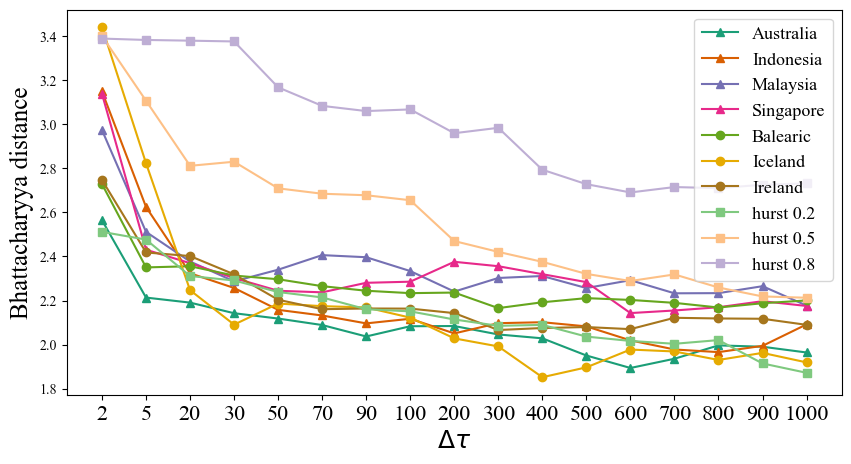

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

# Plot Asia lines
for i, df in enumerate(asia_dis):
    ax.plot(range(len(df)), df, '^-', color=asia_colors[i], label=asia_region[i])

# Plot Europe lines
for i, df in enumerate(euro_dis):
    ax.plot(range(len(df)), df, 'o-', color=euro_colors[i], label=euro_region[i])

# Plot FBM lines
for i, df in enumerate(fou_dis):
    ax.plot(range(len(df)), df, 's-', color=colors[i], label=fbm_dict[i])

#ax.set_title('Bhattacharyya distance', fontsize=16)
ax.set_xlabel('$\u0394\u03C4$', fontsize=18)
ax.set_ylabel('Bhattacharyya distance', fontsize=18)
plt.xticks(range(len(tau_sets)), [2,5,20,30,50,70,90,100,200,300,400,500,600,700,800,900,1000], fontsize=16) 
plt.legend(fontsize=13, loc='upper right')

plt.rcParams.update({'font.family': 'Times New Roman'})
#plt.show()
plt.savefig('C:/4. Paper plots/figure 6.pdf')